## Тема 1. Моделирование геометрической вероятности

0.5031
0.5


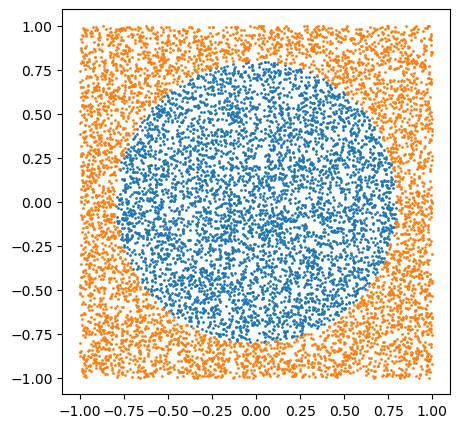

In [19]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

R = np.sqrt(2 / np.pi)
h = x**2 + y**2 <= R**2

print(h.mean())
print(2 / 4)

plt.figure(figsize=(5,5))
plt.scatter(x[h], y[h], s=1)
plt.scatter(x[~h], y[~h], s=1)
plt.axis("equal")
plt.show()


## Тема 2. Связь частотного и классического определения вероятности

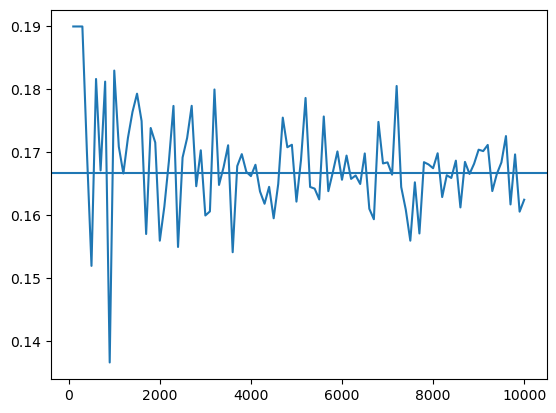

In [20]:
import numpy as np
import matplotlib.pyplot as pl

trials = range(100, 10001, 100)
freq = []

for n in trials:
    dice = np.random.randint(1, 7, (n, 2))
    freq.append(np.mean(dice.sum(axis=1) == 7))

pl.plot(trials, freq)
pl.axhline(1/6)
pl.show()


## Тема 3. Применение условных вероятностей в анализе данных

Рассматривается набор данных об автомобилях с признаками типа кузова и рейтинга.

In [21]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    "Кузов": np.random.choice(["Седан", "Универсал", "Хэтчбэк"], 1000),
    "Рейтинг": np.random.choice(["Высокий", "Низкий"], 1000, p=[0.6, 0.4])
})

pd.crosstab(data["Кузов"], data["Рейтинг"], normalize="index")


Рейтинг,Высокий,Низкий
Кузов,,
Седан,0.626471,0.373529
Универсал,0.614458,0.385542
Хэтчбэк,0.628049,0.371951


## Тема 4. Парадокс Монти Холла

Исследуется влияние смены выбора на вероятность выигрыша.

In [22]:
import numpy as np

def monty(n=10000, switch=True):
    win = 0
    for _ in range(n):
        prize = np.random.randint(3)
        choice = np.random.randint(3)
        if switch:
            opened = [i for i in range(3) if i != choice and i != prize][0]
            choice = [i for i in range(3) if i not in (choice, opened)][0]
        if choice == prize:
            win += 1
    return win / n

print(monty(switch=False))
print(monty(switch=True))


0.3406
0.6678


## Тема 5. Законы распределения дискретных случайных величин

## Биномиальное распределение
Условие задачи

В компании из 15 сотрудников вероятность того, что сотрудник придёт на работу вовремя, равна 0.7. Пусть случайная величина X — количество сотрудников, пришедших вовремя.

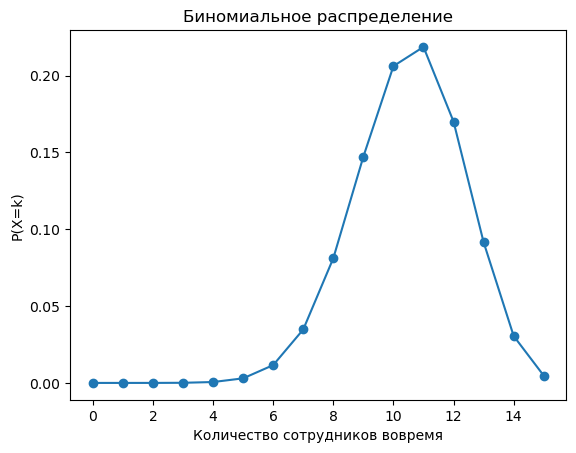

(np.float64(10.5),
 np.float64(3.1500000000000012),
 np.float64(1.774823934929885),
 np.float64(11.0))

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 15
p = 0.7
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

pl.figure()
pl.plot(x, pmf, marker='o')
pl.title('Биномиальное распределение')
pl.xlabel('Количество сотрудников вовремя')
pl.ylabel('P(X=k)')
pl.show()

mean = binom.mean(n, p)
var = binom.var(n, p)
std = binom.std(n, p)
mode = np.floor((n+1)*p)

mean, var, std, mode


## Закон распределения Пуассона
Условие задачи

В кафе в среднем за час заходят 4 посетителя. Пусть X — количество посетителей за один час.

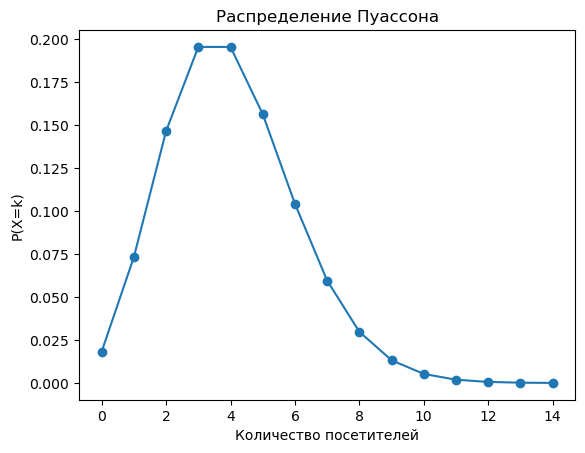

(np.float64(4.0), np.float64(4.0), np.float64(2.0), 4)

In [24]:
from scipy.stats import poisson

lambda_ = 4
x = np.arange(0, 15)
pmf = poisson.pmf(x, lambda_)

pl.figure()
pl.plot(x, pmf, marker='o')
pl.title('Распределение Пуассона')
pl.xlabel('Количество посетителей')
pl.ylabel('P(X=k)')
pl.show()

mean = poisson.mean(lambda_)
var = poisson.var(lambda_)
std = poisson.std(lambda_)
mode = int(np.floor(lambda_))

mean, var, std, mode


## Геометрическое распределение
Условие задачи

Монета подбрасывается до первого появления орла. Пусть X — количество подбрасываний до первого орла (успеха), вероятность орла p = 0.5

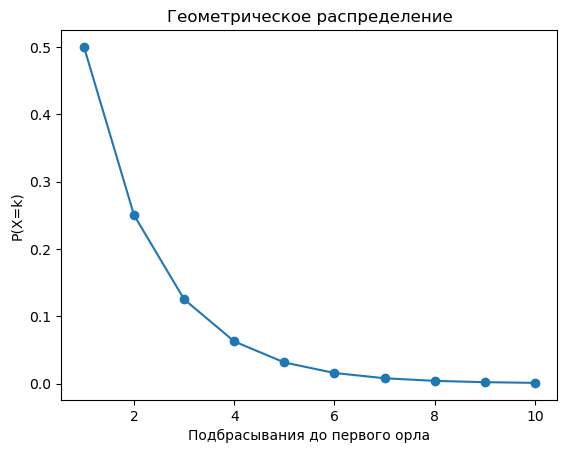

(np.float64(2.0), np.float64(2.0), np.float64(1.4142135623730951), 1)

In [25]:
from scipy.stats import geom

p = 0.5
x = np.arange(1, 11)
pmf = geom.pmf(x, p)

pl.figure()
pl.plot(x, pmf, marker='o')
pl.title('Геометрическое распределение')
pl.xlabel('Подбрасывания до первого орла')
pl.ylabel('P(X=k)')
pl.show()

mean = geom.mean(p)
var = geom.var(p)
std = geom.std(p)
mode = 1

mean, var, std, mode


## Гипергеометрическое распределение
Условие задачи
В коробке 20 ламп, из них 5 бракованных. Извлекаем случайно 4 лампы. Пусть X — количество бракованных ламп среди выбранных.

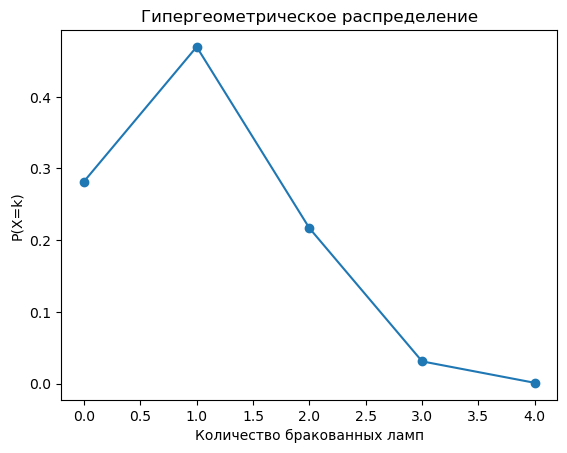

(np.float64(1.0),
 np.float64(0.631578947368421),
 np.float64(0.7947194142390263),
 1.3636363636363635)

In [26]:
from scipy.stats import hypergeom

M = 20  
n = 5   
N = 4  
x = np.arange(0, N+1)
pmf = hypergeom.pmf(x, M, n, N)

pl.figure()
pl.plot(x, pmf, marker='o')
pl.title('Гипергеометрическое распределение')
pl.xlabel('Количество бракованных ламп')
pl.ylabel('P(X=k)')
pl.show()

mean = hypergeom.mean(M, n, N)
var = hypergeom.var(M, n, N)
std = np.sqrt(var)
mode = (N+1)*(n+1)/(M+2)  
mean, var, std, mode


## Тема 6. Создание собственного распределения

1.0


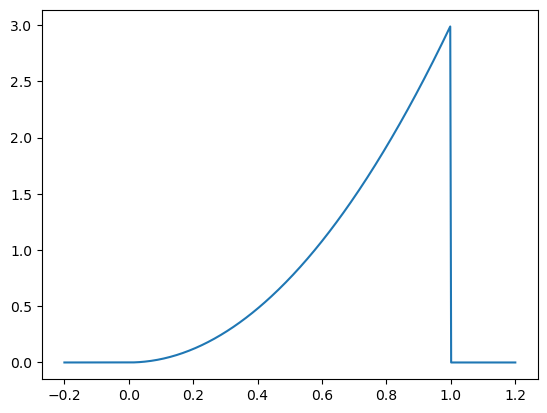

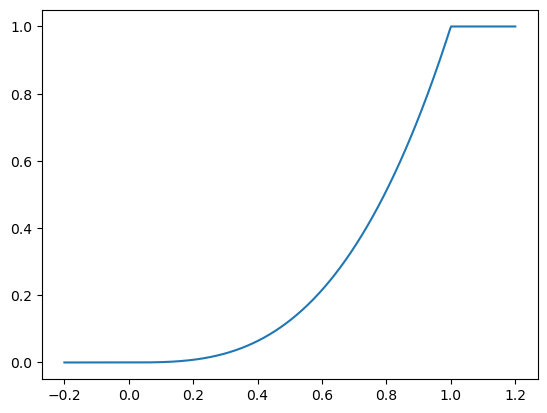

0.20799999999999993
0.208
0.7499999999999999
0.037499999999999645
0.19364916731036994
0.748248445888352
0.03781397547110229
0.19445815866427998
0.8879040017426006
0.9654893846056298
-0.8606629658237878
0.09523808568218195


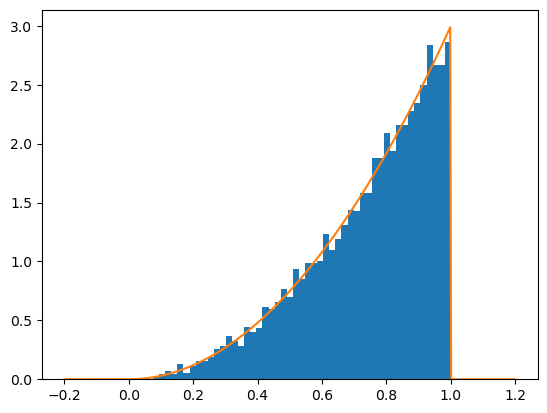

In [27]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import rv_continuous
from scipy.integrate import quad

class CustomDistribution(rv_continuous):
    def _pdf(self, x):
        return np.where((0 <= x) & (x <= 1), 3 * x**2, 0)

custom_dist = CustomDistribution(a=0, b=1)

norm, _ = quad(custom_dist.pdf, -np.inf, np.inf)
print(norm)

x = np.linspace(-0.2, 1.2, 500)

pdf_values = custom_dist.pdf(x)
cdf_values = custom_dist.cdf(x)

pl.figure()
pl.plot(x, pdf_values)
pl.show()

pl.figure()
pl.plot(x, cdf_values)
pl.show()

P1 = custom_dist.cdf(0.6) - custom_dist.cdf(0.2)
print(P1)

P2, _ = quad(custom_dist.pdf, 0.2, 0.6)
print(P2)

mean_theory = custom_dist.mean()
var_theory = custom_dist.var()
std_theory = custom_dist.std()

print(mean_theory)
print(var_theory)
print(std_theory)

rvs = custom_dist.rvs(size=10000)

mean_sample = np.mean(rvs)
var_sample = np.var(rvs)
std_sample = np.std(rvs)

print(mean_sample)
print(var_sample)
print(std_sample)

q1 = custom_dist.ppf(0.7)
q2 = custom_dist.ppf(0.9)

print(q1)
print(q2)

skew, kurt = custom_dist.stats(moments='sk')
print(skew)
print(kurt)

pl.figure()
pl.hist(rvs, bins=50, density=True)
pl.plot(x, pdf_values)
pl.show()


## Тема 7. Исследование зависимости плотности от параметров НСВ

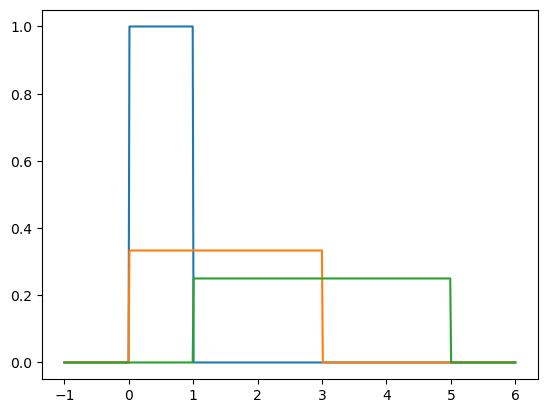

1.5147015113779565
0.7488909133715761
1.5
0.75


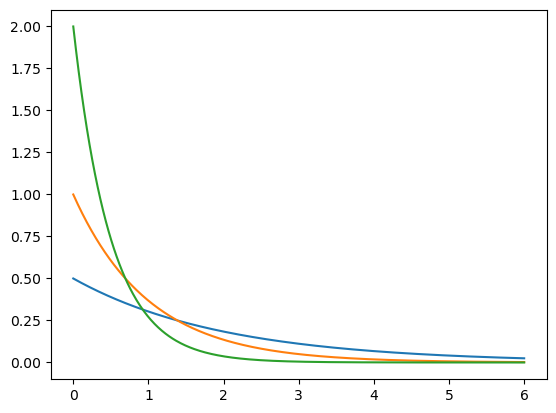

0.979206255279236
0.9402851627862514
1
1


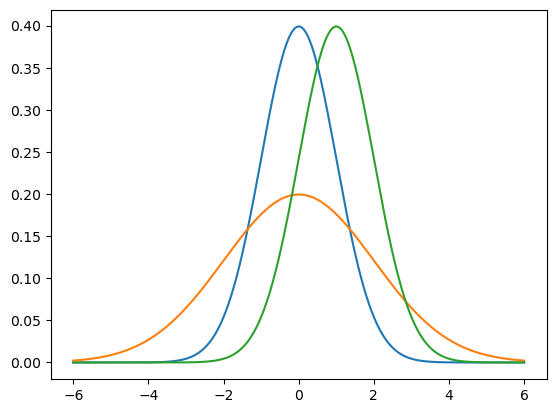

-0.0031174697250399164
1.022881236151991
0
1


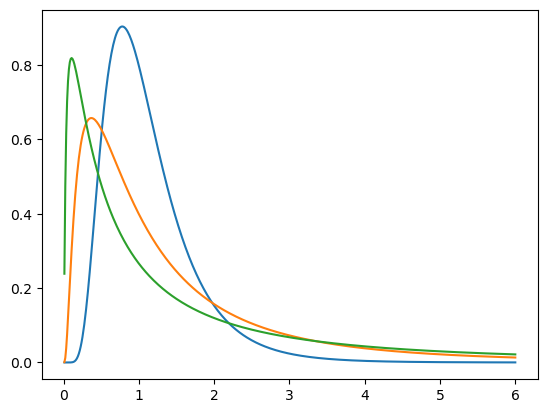

1.3485365315582984
1.6154795052243878
1.3771277643359572
1.7001588462643311


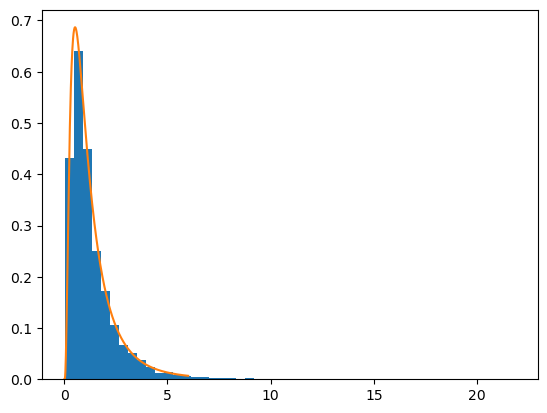

In [28]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import uniform, expon, norm, lognorm

x = np.linspace(-1, 6, 500)
for a, b in [(0, 1), (0, 3), (1, 5)]:
    pl.plot(x, uniform.pdf(x, loc=a, scale=b - a))
pl.show()

rvs_uniform = uniform.rvs(loc=0, scale=3, size=10000)
print(np.mean(rvs_uniform))
print(np.var(rvs_uniform))
print((0 + 3) / 2)
print((3 - 0) ** 2 / 12)

x = np.linspace(0, 6, 500)
for l in [0.5, 1, 2]:
    pl.plot(x, expon.pdf(x, scale=1 / l))
pl.show()

rvs_expon = expon.rvs(scale=1, size=10000)
print(np.mean(rvs_expon))
print(np.var(rvs_expon))
print(1)
print(1)

x = np.linspace(-6, 6, 500)
for mu, sigma in [(0, 1), (0, 2), (1, 1)]:
    pl.plot(x, norm.pdf(x, mu, sigma))
pl.show()

rvs_norm = norm.rvs(loc=0, scale=1, size=10000)
print(np.mean(rvs_norm))
print(np.var(rvs_norm))
print(0)
print(1)

x = np.linspace(0.01, 6, 500)
for s in [0.5, 1, 1.5]:
    pl.plot(x, lognorm.pdf(x, s))
pl.show()

s = 0.8
mu = 0
rvs_lognorm = lognorm.rvs(s=s, scale=np.exp(mu), size=10000)

mean_sample = np.mean(rvs_lognorm)
var_sample = np.var(rvs_lognorm)

mean_theory = np.exp(mu + s ** 2 / 2)
var_theory = (np.exp(s ** 2) - 1) * np.exp(2 * mu + s ** 2)

print(mean_sample)
print(var_sample)
print(mean_theory)
print(var_theory)

pl.hist(rvs_lognorm, bins=50, density=True)
pl.plot(x, lognorm.pdf(x, s, scale=np.exp(mu)))
pl.show()
